# Random Forest Regressor

In [32]:
import pandas as pd
import numpy as np
import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV

from datetime import datetime

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
df = pd.read_csv('../data/spy_2002-1-1_2022-12-31_d.csv', index_col=0)
df

,Open,High,Low,Close,Volume
Date,,,,,
2001-12-31,77.603947,77.764298,76.321128,76.367897,14619500
2002-01-02,76.909097,77.336703,76.040518,77.189713,18651900
2002-01-03,77.269879,78.138452,77.196383,78.064957,15743000
2002-01-04,78.285449,78.826642,77.871208,78.586113,20140700
2002-01-07,78.639571,78.833331,77.877897,78.031570,13106500
...,...,...,...,...,...
2022-12-23,378.206578,381.603617,376.592742,381.454193,59857300
2022-12-27,381.334651,381.693267,378.206574,379.949921,51638200
2022-12-28,379.880163,381.932359,374.988858,375.227936,70911500


In [3]:
learn_df = df[['Close', 'Low', 'High']]

learn_df['future_price'] = learn_df['Close'].shift(-1)
learn_df

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Close,Low,High,future_price
Date,,,,
2001-12-31,76.367897,76.321128,77.764298,77.189713
2002-01-02,77.189713,76.040518,77.336703,78.064957
2002-01-03,78.064957,77.196383,78.138452,78.586113
2002-01-04,78.586113,77.871208,78.826642,78.031570
2002-01-07,78.031570,77.877897,78.833331,77.851166
...,...,...,...,...
2022-12-23,381.454193,376.592742,381.603617,379.949921
2022-12-27,379.949921,378.206574,381.693267,375.227936
2022-12-28,375.227936,374.988858,381.932359,381.982178


In [4]:
learn_df.dropna(inplace=True)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [5]:
training_size = int(len(learn_df) * 0.70)
train_data = learn_df.iloc[:training_size]
test_data = learn_df.iloc[training_size:]

In [6]:
X_train = train_data[['Close', 'High', 'Low']]
y_train = train_data['future_price']

X_test = test_data[['Close', 'High', 'Low']]
y_test = test_data['future_price']

In [17]:
regr = RandomForestRegressor(
            n_estimators=10,
            max_depth=7,
            min_samples_split=8,
            min_samples_leaf=1,
            random_state=0,
#             verbose=2
)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, min_samples_split=8, n_estimators=10,
                      random_state=0)

In [18]:
prediction = regr.predict(X_test)

In [19]:
regr.score(X_test, y_test)

-2.0820027584625

In [20]:
prediction

array([192.80073821, 191.37206998, 191.22947063, ..., 192.73434154,
       192.73434154, 192.73434154])

In [24]:
X_test

,Close,High,Low
Date,,,
2016-09-12,191.993011,192.410119,188.416550
2016-09-13,189.233017,190.936938,188.585175
2016-09-14,189.162033,190.537598,188.585190
2016-09-15,191.052353,191.451707,188.807081
2016-09-16,190.313736,190.599164,189.600193
...,...,...,...
2022-12-22,379.272491,384.741609,373.345101
2022-12-23,381.454193,381.603617,376.592742
2022-12-27,379.949921,381.693267,378.206574


In [25]:
y_test

Date
2016-09-12    189.233017
2016-09-13    189.162033
2016-09-14    191.052353
2016-09-15    190.313736
2016-09-16    190.349457
                 ...    
2022-12-22    381.454193
2022-12-23    379.949921
2022-12-27    375.227936
2022-12-28    381.982178
2022-12-29    380.975983
Name: future_price, Length: 1587, dtype: float64

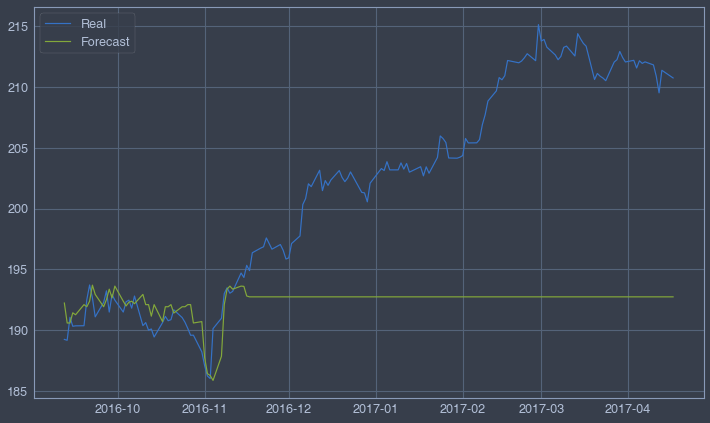

In [46]:
thr = 150

plt.plot(pd.to_datetime(y_test[:thr].index), y_test[:thr].values, label='Real')
plt.plot(pd.to_datetime(y_test[:thr].index), prediction[:thr], label='Forecast')
plt.legend()

In [12]:
clf_rf = RandomForestRegressor(random_state=0)
params = {'n_estimators': range(10, 50, 10), 'max_depth': range(1, 12, 2),
         'min_samples_leaf': [1, 7], 'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)

In [13]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [14]:
grid_search_cv_clf.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 10}

In [15]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

-2.0820027584625

In [16]:
best_clf.feature_importances_

array([0.4472672 , 0.35073171, 0.20200109])

In [21]:
pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('robust', RobustScaler()),
    ('poly', PolynomialFeatures()),
    ('rf', RandomForestRegressor(
            n_estimators=10,
            max_depth=7,
            min_samples_split=8,
            min_samples_leaf=1,
            random_state=0,
#         verbose=2
    ))
])

In [22]:
pipeline.fit(X_train, y_train)

prediction = pipeline.predict(X_test)

r2 = r2_score(y_test, prediction)
print(f'R2 score: {r2}')

R2 score: -2.082002184081284


In [23]:
prediction

array([192.22446059, 190.58384088, 190.58384088, ..., 192.73434154,
       192.73434154, 192.73434154])